In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import math

In [43]:
content = Image.open("Sets/Set6/content.jpg")
style = Image.open("Sets/Set6/style.png")

In [44]:
content_np = np.array(content)
style_np = np.array(style)

In [45]:
def find_ratio(content, style):
    return content.shape[1]/content.shape[0], style.shape[1]/style.shape[0] #length/height

In [46]:
c, s = find_ratio(content_np, style_np)

In [47]:
print(c,s)

2.857142857142857 1.7811704834605597


## Resizing Style Image (Centre Crop) to match content

In [48]:
def crop_style(image, ratio_con, ratio_style):
    global style
    h = image.shape[0]
    l = image.shape[1]
    nh = image.shape[0]
    nl = image.shape[1]
    new_r = ratio_style
    if ratio_con > ratio_style:
        while np.abs(new_r-ratio_con) > 0.001:
            nh -= 0.05
            new_r = nl/nh
            print(new_r)
    else:
        while np.abs(new_r-ratio_con) > 0.001:
            nl -= 0.05
            new_r = nl/nh
            print(new_r)
    nh, nl = round(nh, 2), round(nl, 2)
    
    # Crop Image
    style = style.crop(box = [(l-nl)//2, (h-nh)//2, l - (l-nl)//2, h - (h-nh)//2])

In [49]:
if np.abs(c-s) > 0.6:
    print("Incompatible. Resizing will result in loss of style data.")
elif c == s:
    pass
else:
    crop_style(style_np, c, s)

Incompatible. Resizing will result in loss of style data.


In [50]:
content = content.resize(style.size, resample=Image.LANCZOS)

In [39]:
content.size

(700, 466)

In [40]:
style.size

(700, 466)

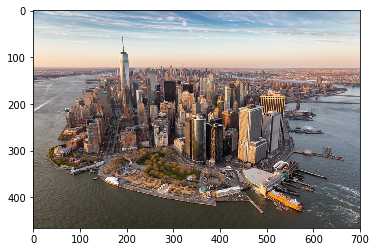

In [41]:
plt.imshow(np.asarray(content))

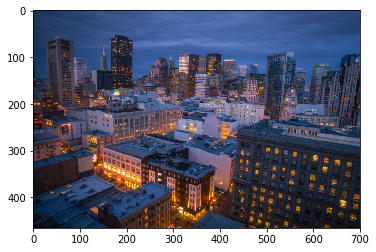

In [42]:
plt.imshow(np.asarray(style))